In [401]:

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


In [402]:
df = pd.read_csv('listings.csv')
df

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,150097,https://www.airbnb.com/rooms/150097,20230606052736,45084,city scrape,Bed and breakfast in North Hollywood · ★4.96 ·...,Welcome to our guest studio house! private ent...,The house is located in a quiet residential ne...,https://a0.muscache.com/pictures/6793974d-9fb2...,647546,...,4.99,4.90,4.95,NaN,f,4,1,3,0,1.67
1,40667,https://www.airbnb.com/rooms/40667,20230606052736,45084,city scrape,Rental unit in Los Angeles · ★4.30 · 1 bedroom...,"<b>The space</b><br />Nice, quiet master bedr...",NaN,https://a0.muscache.com/pictures/70033015/cb7f...,175264,...,4.64,4.36,4.45,NaN,f,1,0,1,0,0.08
2,109,https://www.airbnb.com/rooms/109,20230606052736,45084,city scrape,Condo in Culver City · 2 bedrooms · 2 beds · 2...,"*** Unit upgraded with new bamboo flooring, ne...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,521,...,4.00,5.00,4.00,NaN,f,1,1,0,0,0.01
3,152514,https://www.airbnb.com/rooms/152514,20230606052736,45084,city scrape,Guesthouse in Manhattan Beach · 1 bedroom · 1 ...,Wake up to the sound of waves crashing on the ...,NaN,https://a0.muscache.com/pictures/prohost-api/H...,733870,...,5.00,5.00,4.00,NaN,f,2,2,0,0,0.01
4,43318,https://www.airbnb.com/rooms/43318,20230606052736,45084,city scrape,Hostel in Los Angeles · ★4.37 · 1 bedroom · 1 ...,Best value in most exciting part of DTLA! Wal...,Little Tokyo is the most vibrant area of downt...,https://a0.muscache.com/pictures/938a66db-d66b...,156094545,...,4.73,4.68,4.53,Exempt - This listing is a hotel or motel,f,14,0,14,0,0.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44459,906838372251518000,https://www.airbnb.com/rooms/906838372251518667,20230606052736,45084,city scrape,Rental unit in Los Angeles · ★New · 2 bedrooms...,Guesthouse is a collection of creatively desig...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,325135786,...,NaN,NaN,NaN,NaN,t,9,9,0,0,NaN
44460,906849730595831000,https://www.airbnb.com/rooms/906849730595831419,20230606052736,45084,city scrape,Rental unit in View Park-Windsor Hills · ★New ...,> Private room with shared bathroom <br />> 3 ...,"Located on Lacienega blvd, Inglewood<br />Plea...",https://a0.muscache.com/pictures/miso/Hosting-...,14936368,...,NaN,NaN,NaN,NaN,f,106,23,83,0,NaN
44461,906864593949172000,https://www.airbnb.com/rooms/906864593949172534,20230606052736,45084,city scrape,Rental unit in Los Angeles · ★New · 1 bedroom ...,> CoLiving apartment with 3 private bedrooms i...,"Hart of Westwood, UCAL walking distance",https://a0.muscache.com/pictures/miso/Hosting-...,14936368,...,NaN,NaN,NaN,NaN,t,106,23,83,0,NaN
44462,906867349473658000,https://www.airbnb.com/rooms/906867349473658950,20230606052736,45083,city scrape,Home in Vernon · ★New · 1 bedroom · 1 bed · 1 ...,Enjoy a stylish experience at this centrally-l...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,390414536,...,NaN,NaN,NaN,NaN,f,69,18,51,0,NaN


In [403]:
# observe the data to see the # of missing value and if datatype is correct
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44464 entries, 0 to 44463
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            44464 non-null  int64  
 1   listing_url                                   44464 non-null  object 
 2   scrape_id                                     44464 non-null  int64  
 3   last_scraped                                  44464 non-null  int64  
 4   source                                        44464 non-null  object 
 5   name                                          44464 non-null  object 
 6   description                                   43765 non-null  object 
 7   neighborhood_overview                         26222 non-null  object 
 8   picture_url                                   44464 non-null  object 
 9   host_id                                       44464 non-null 

In [404]:
# get the percentage of missing value in each column and decide to remove which variable
def get_missing_value_percentage(df):
    missing_col = [col for col in df.columns if df[col].isnull().sum() > 0]
    miss_per = {}
    total = df.shape[0]
    for i in missing_col:
        count = df[i].isnull().sum()
        per = count / total * 100
        miss_per[i] = per
        print('{}: {} ({})'.format(i, count, round(per, 3)))
    return miss_per
        

In [405]:
miss_per = get_missing_value_percentage(df)

description: 699 (1.572)
neighborhood_overview: 18242 (41.026)
host_name: 2 (0.004)
host_since: 2 (0.004)
host_location: 9173 (20.63)
host_about: 18311 (41.182)
host_response_time: 9975 (22.434)
host_response_rate: 9975 (22.434)
host_acceptance_rate: 9423 (21.192)
host_is_superhost: 11881 (26.72)
host_thumbnail_url: 2 (0.004)
host_picture_url: 2 (0.004)
host_neighbourhood: 9157 (20.594)
host_listings_count: 2 (0.004)
host_total_listings_count: 2 (0.004)
host_has_profile_pic: 2 (0.004)
host_identity_verified: 2 (0.004)
neighbourhood: 18241 (41.024)
bathrooms: 44464 (100.0)
bathrooms_text: 29 (0.065)
bedrooms: 14752 (33.177)
beds: 552 (1.241)
minimum_minimum_nights: 4 (0.009)
maximum_minimum_nights: 4 (0.009)
minimum_maximum_nights: 4 (0.009)
maximum_maximum_nights: 4 (0.009)
minimum_nights_avg_ntm: 4 (0.009)
maximum_nights_avg_ntm: 4 (0.009)
calendar_updated: 44464 (100.0)
first_review: 12689 (28.538)
last_review: 12689 (28.538)
review_scores_rating: 12689 (28.538)
review_scores_accurac

In [406]:
miss_df = pd.DataFrame.from_dict(miss_per, orient = 'index')
miss_df.sort_values(ascending = False, by=[0])

,0
calendar_updated,100.000000
bathrooms,100.000000
license,78.438737
host_about,41.181630
neighborhood_overview,41.026448
neighbourhood,41.024199
bedrooms,33.177402
review_scores_value,29.106693
review_scores_location,29.102195
review_scores_checkin,29.097697


## correcting the datatype

In [407]:
#to-do list
#host_since, last_review should be date; 
#calculate time elapsed till today
# host_is_superhost, host_has_profile_pic, host_identity_verified, has_availability, instant_bookable should be boolean
#consider whether it has license or not is meaningful, so convert to boolean

#property_type has typo and need further examination
#check the # of beds if the bedroom is null


In [408]:
#pip install xlrd

In [409]:
#host_since, last_review should be date; 
from datetime import datetime
import xlrd
df = df[df['host_since'].isnull() == False]
df['host_since'].isnull().sum()
# df['host_since'] = df['host_since'].astype('int64')
df['host_since'] = df['host_since'].apply(lambda x: np.int32(x) if not pd.isnull(x) else 0)
df['host_since'] = df['host_since'].apply(lambda x: xlrd.xldate_as_datetime(x, 0) if x!=0 else pd.NaT)
df['host_since']

C:\Users\Zhaoyq\AppData\Local\Temp\ipykernel_12440\279311208.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['host_since'] = df['host_since'].apply(lambda x: np.int32(x) if not pd.isnull(x) else 0)
C:\Users\Zhaoyq\AppData\Local\Temp\ipykernel_12440\279311208.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['host_since'] = df['host_since'].apply(lambda x: xlrd.xldate_as_datetime(x, 0) if x!=0 else pd.NaT)


0       2011-05-31
1       2010-07-20
2       2008-06-27
3       2011-06-23
4       2017-10-24
           ...    
44459   2020-01-07
44460   2019-05-30
44461   2019-05-30
44462   2021-02-27
44463   2021-02-27
Name: host_since, Length: 44462, dtype: datetime64[ns]

In [410]:
df['last_review'] = df['last_review'].apply(lambda x: np.int32(x) if not pd.isnull(x) else 0 )
df['last_review'] = df['last_review'].apply(lambda x: xlrd.xldate_as_datetime(x, 0) if x!=0 else pd.NaT)
df['last_review'] 

C:\Users\Zhaoyq\AppData\Local\Temp\ipykernel_12440\4158542427.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['last_review'] = df['last_review'].apply(lambda x: np.int32(x) if not pd.isnull(x) else 0 )
C:\Users\Zhaoyq\AppData\Local\Temp\ipykernel_12440\4158542427.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['last_review'] = df['last_review'].apply(lambda x: xlrd.xldate_as_datetime(x, 0) if x!=0 else pd.NaT)


0       2020-11-29
1       2018-08-24
2       2016-05-15
3       2013-05-24
4       2023-05-18
           ...    
44459          NaT
44460          NaT
44461          NaT
44462          NaT
44463          NaT
Name: last_review, Length: 44462, dtype: datetime64[ns]

In [411]:
# Time elapsed till today
#assumption to be tested: earlier the host registered, higher the price(host reputation); earlier the last review posted, higher the price(property popularity)
today = datetime.today()
df['host_since_elapsed'] = round((today - df['host_since']) / np.timedelta64(1, 'M'), 0)
df['last_review_elapsed'] = round((today - df['last_review']) / np.timedelta64(1, 'M'), 0)
df.head()

C:\Users\Zhaoyq\AppData\Local\Temp\ipykernel_12440\2808660901.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['host_since_elapsed'] = round((today - df['host_since']) / np.timedelta64(1, 'M'), 0)
C:\Users\Zhaoyq\AppData\Local\Temp\ipykernel_12440\2808660901.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['last_review_elapsed'] = round((today - df['last_review']) / np.timedelta64(1, 'M'), 0)


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_since_elapsed,last_review_elapsed
0,150097,https://www.airbnb.com/rooms/150097,20230606052736,45084,city scrape,Bed and breakfast in North Hollywood · ★4.96 ·...,Welcome to our guest studio house! private ent...,The house is located in a quiet residential ne...,https://a0.muscache.com/pictures/6793974d-9fb2...,647546,...,4.95,NaN,f,4,1,3,0,1.67,150.0,36.0
1,40667,https://www.airbnb.com/rooms/40667,20230606052736,45084,city scrape,Rental unit in Los Angeles · ★4.30 · 1 bedroom...,"<b>The space</b><br />Nice, quiet master bedr...",NaN,https://a0.muscache.com/pictures/70033015/cb7f...,175264,...,4.45,NaN,f,1,0,1,0,0.08,160.0,63.0
2,109,https://www.airbnb.com/rooms/109,20230606052736,45084,city scrape,Condo in Culver City · 2 bedrooms · 2 beds · 2...,"*** Unit upgraded with new bamboo flooring, ne...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,521,...,4.00,NaN,f,1,1,0,0,0.01,185.0,90.0
3,152514,https://www.airbnb.com/rooms/152514,20230606052736,45084,city scrape,Guesthouse in Manhattan Beach · 1 bedroom · 1 ...,Wake up to the sound of waves crashing on the ...,NaN,https://a0.muscache.com/pictures/prohost-api/H...,733870,...,4.00,NaN,f,2,2,0,0,0.01,149.0,126.0
4,43318,https://www.airbnb.com/rooms/43318,20230606052736,45084,city scrape,Hostel in Los Angeles · ★4.37 · 1 bedroom · 1 ...,Best value in most exciting part of DTLA! Wal...,Little Tokyo is the most vibrant area of downt...,https://a0.muscache.com/pictures/938a66db-d66b...,156094545,...,4.53,Exempt - This listing is a hotel or motel,f,14,0,14,0,0.72,73.0,6.0


In [412]:
# host_is_superhost, host_has_profile_pic, host_identity_verified, has_availability, instant_bookable should be boolean
list1 = ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'has_availability', 'instant_bookable']
for i in list1:
    df[i] = df[i].apply(lambda x: x == 't' if not pd.isnull(x) else np.nan )
df.head()

C:\Users\Zhaoyq\AppData\Local\Temp\ipykernel_12440\667386229.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = df[i].apply(lambda x: x == 't' if not pd.isnull(x) else np.nan )


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_since_elapsed,last_review_elapsed
0,150097,https://www.airbnb.com/rooms/150097,20230606052736,45084,city scrape,Bed and breakfast in North Hollywood · ★4.96 ·...,Welcome to our guest studio house! private ent...,The house is located in a quiet residential ne...,https://a0.muscache.com/pictures/6793974d-9fb2...,647546,...,4.95,NaN,False,4,1,3,0,1.67,150.0,36.0
1,40667,https://www.airbnb.com/rooms/40667,20230606052736,45084,city scrape,Rental unit in Los Angeles · ★4.30 · 1 bedroom...,"<b>The space</b><br />Nice, quiet master bedr...",NaN,https://a0.muscache.com/pictures/70033015/cb7f...,175264,...,4.45,NaN,False,1,0,1,0,0.08,160.0,63.0
2,109,https://www.airbnb.com/rooms/109,20230606052736,45084,city scrape,Condo in Culver City · 2 bedrooms · 2 beds · 2...,"*** Unit upgraded with new bamboo flooring, ne...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,521,...,4.00,NaN,False,1,1,0,0,0.01,185.0,90.0
3,152514,https://www.airbnb.com/rooms/152514,20230606052736,45084,city scrape,Guesthouse in Manhattan Beach · 1 bedroom · 1 ...,Wake up to the sound of waves crashing on the ...,NaN,https://a0.muscache.com/pictures/prohost-api/H...,733870,...,4.00,NaN,False,2,2,0,0,0.01,149.0,126.0
4,43318,https://www.airbnb.com/rooms/43318,20230606052736,45084,city scrape,Hostel in Los Angeles · ★4.37 · 1 bedroom · 1 ...,Best value in most exciting part of DTLA! Wal...,Little Tokyo is the most vibrant area of downt...,https://a0.muscache.com/pictures/938a66db-d66b...,156094545,...,4.53,Exempt - This listing is a hotel or motel,False,14,0,14,0,0.72,73.0,6.0


In [413]:
#consider whether it has license or not is meaningful, so convert to boolean
#assumption to be tested: property without license is hotel or motel, may have a higher or lower price
df['license'] = df['license'].apply(lambda x: True if not pd.isna(x) else False)
df['license'] 

C:\Users\Zhaoyq\AppData\Local\Temp\ipykernel_12440\4242438962.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['license'] = df['license'].apply(lambda x: True if not pd.isna(x) else False)


0        False
1        False
2        False
3        False
4         True
         ...  
44459    False
44460    False
44461    False
44462    False
44463    False
Name: license, Length: 44462, dtype: bool

In [414]:
#convert variable price to float point number
df['price'] = df['price'].astype('float64')
df['price'].dtype

C:\Users\Zhaoyq\AppData\Local\Temp\ipykernel_12440\2730555201.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'] = df['price'].astype('float64')


dtype('float64')

## remove obviously irrelevant column

In [415]:
#drop bathrooms,calendar_last_scraped,first_review,calendar_updated
df = df.drop(['bathrooms','calendar_last_scraped','first_review','calendar_updated'],axis=1)
df = df.drop(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source'],axis=1)

In [416]:
df.drop(list(df.filter(regex='url')), axis=1, inplace=True)

In [417]:
df.head()

,name,description,neighborhood_overview,host_id,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,...,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_since_elapsed,last_review_elapsed
0,Bed and breakfast in North Hollywood · ★4.96 ·...,Welcome to our guest studio house! private ent...,The house is located in a quiet residential ne...,647546,Marco,2011-05-31,"North Hollywood, CA","Hey, I'm Marco!\r\n\r\nWelcome, your comfort a...",within an hour,1.0,...,4.95,False,False,4,1,3,0,1.67,150.0,36.0
1,Rental unit in Los Angeles · ★4.30 · 1 bedroom...,"<b>The space</b><br />Nice, quiet master bedr...",NaN,175264,Michael,2010-07-20,"Los Angeles, CA",I am a British DJ and photographer working in ...,within a day,1.0,...,4.45,False,False,1,0,1,0,0.08,160.0,63.0
2,Condo in Culver City · 2 bedrooms · 2 beds · 2...,"*** Unit upgraded with new bamboo flooring, ne...",NaN,521,Paolo,2008-06-27,"San Francisco, CA","Paolo Privitera, CEO Evensi\n\nPaolo, MIT MBA ...",within a few hours,1.0,...,4.00,False,False,1,1,0,0,0.01,185.0,90.0
3,Guesthouse in Manhattan Beach · 1 bedroom · 1 ...,Wake up to the sound of waves crashing on the ...,NaN,733870,Jeanette,2011-06-23,"Fort Lauderdale, FL","Summers in Manhattan Beach, CA, winters in For...",within an hour,1.0,...,4.00,False,False,2,2,0,0,0.01,149.0,126.0
4,Hostel in Los Angeles · ★4.37 · 1 bedroom · 1 ...,Best value in most exciting part of DTLA! Wal...,Little Tokyo is the most vibrant area of downt...,156094545,Sogo,2017-10-24,NaN,NaN,NaN,NaN,...,4.53,True,False,14,0,14,0,0.72,73.0,6.0



## resolve the missing values

In [419]:
miss_per_2 = get_missing_value_percentage(df)
miss_df_2 = pd.DataFrame.from_dict(miss_per_2, orient='index')
miss_df_2.sort_values(ascending=False, by=[0])

description: 699 (1.572)
neighborhood_overview: 18241 (41.026)
host_location: 9171 (20.627)
host_about: 18309 (41.179)
host_response_time: 9973 (22.43)
host_response_rate: 9973 (22.43)
host_acceptance_rate: 9421 (21.189)
host_is_superhost: 11880 (26.719)
host_neighbourhood: 9155 (20.591)
neighbourhood: 18240 (41.024)
bathrooms_text: 29 (0.065)
bedrooms: 14751 (33.177)
beds: 552 (1.242)
minimum_minimum_nights: 4 (0.009)
maximum_minimum_nights: 4 (0.009)
minimum_maximum_nights: 4 (0.009)
maximum_maximum_nights: 4 (0.009)
minimum_nights_avg_ntm: 4 (0.009)
maximum_nights_avg_ntm: 4 (0.009)
last_review: 12688 (28.537)
review_scores_rating: 12688 (28.537)
review_scores_accuracy: 12931 (29.083)
review_scores_cleanliness: 12932 (29.086)
review_scores_checkin: 12936 (29.095)
review_scores_communication: 12930 (29.081)
review_scores_location: 12938 (29.099)
review_scores_value: 12940 (29.104)
reviews_per_month: 12688 (28.537)
last_review_elapsed: 12688 (28.537)


,0
host_about,41.178984
neighborhood_overview,41.026045
neighbourhood,41.023796
bedrooms,33.176645
review_scores_value,29.103504
review_scores_location,29.099006
review_scores_checkin,29.094508
review_scores_cleanliness,29.085511
review_scores_accuracy,29.083262
review_scores_communication,29.081013


In [420]:
## there are lots of columns describing the information about host, since if host_about is not null, people will have more info about this host and thus tend to rent this property more likely(assumption), so we will convert 'host_about' into boolean, true for not null and false for null; 
# the same for neighborhood_overview
df['host_about'] = df['host_about'].notnull()
df['host_about'].value_counts()

True     26153
False    18309
Name: host_about, dtype: int64

In [421]:
df['neighborhood_overview'] = df['neighborhood_overview'].notnull()
df['neighborhood_overview'].value_counts()

True     26221
False    18241
Name: neighborhood_overview, dtype: int64

In [422]:

## necessary info of 'neighbourhood' was included in the 'neighbourhood_group_cleansed', so we remove this column
df.drop(['neighbourhood'], axis=1, inplace=True)

In [423]:

df.head()

,name,description,neighborhood_overview,host_id,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,...,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_since_elapsed,last_review_elapsed
0,Bed and breakfast in North Hollywood · ★4.96 ·...,Welcome to our guest studio house! private ent...,True,647546,Marco,2011-05-31,"North Hollywood, CA",True,within an hour,1.0,...,4.95,False,False,4,1,3,0,1.67,150.0,36.0
1,Rental unit in Los Angeles · ★4.30 · 1 bedroom...,"<b>The space</b><br />Nice, quiet master bedr...",False,175264,Michael,2010-07-20,"Los Angeles, CA",True,within a day,1.0,...,4.45,False,False,1,0,1,0,0.08,160.0,63.0
2,Condo in Culver City · 2 bedrooms · 2 beds · 2...,"*** Unit upgraded with new bamboo flooring, ne...",False,521,Paolo,2008-06-27,"San Francisco, CA",True,within a few hours,1.0,...,4.00,False,False,1,1,0,0,0.01,185.0,90.0
3,Guesthouse in Manhattan Beach · 1 bedroom · 1 ...,Wake up to the sound of waves crashing on the ...,False,733870,Jeanette,2011-06-23,"Fort Lauderdale, FL",True,within an hour,1.0,...,4.00,False,False,2,2,0,0,0.01,149.0,126.0
4,Hostel in Los Angeles · ★4.37 · 1 bedroom · 1 ...,Best value in most exciting part of DTLA! Wal...,True,156094545,Sogo,2017-10-24,NaN,False,NaN,NaN,...,4.53,True,False,14,0,14,0,0.72,73.0,6.0


In [424]:
# for properties that don't have review scores, assuming customer will hold a neutral view towards this property, review scores tend not to affect their decision; so we use mean value to fill up th missing value
cols = list(df.columns)
review_list = [i for i in df.columns if 'review_scores' in i]
review_list

['review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value']

In [425]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
for i in range(len(review_list)):
    df[review_list[i]] = imputer.fit_transform(df[[review_list[i]]])

In [426]:
miss_per_3 = get_missing_value_percentage(df)
miss_df_3 = pd.DataFrame.from_dict(miss_per_3, orient='index')
miss_df_3.sort_values(ascending=False, by=[0])

description: 699 (1.572)
host_location: 9171 (20.627)
host_response_time: 9973 (22.43)
host_response_rate: 9973 (22.43)
host_acceptance_rate: 9421 (21.189)
host_is_superhost: 11880 (26.719)
host_neighbourhood: 9155 (20.591)
bathrooms_text: 29 (0.065)
bedrooms: 14751 (33.177)
beds: 552 (1.242)
minimum_minimum_nights: 4 (0.009)
maximum_minimum_nights: 4 (0.009)
minimum_maximum_nights: 4 (0.009)
maximum_maximum_nights: 4 (0.009)
minimum_nights_avg_ntm: 4 (0.009)
maximum_nights_avg_ntm: 4 (0.009)
last_review: 12688 (28.537)
reviews_per_month: 12688 (28.537)
last_review_elapsed: 12688 (28.537)


,0
bedrooms,33.176645
last_review_elapsed,28.536728
last_review,28.536728
reviews_per_month,28.536728
host_is_superhost,26.719446
host_response_time,22.430390
host_response_rate,22.430390
host_acceptance_rate,21.188880
host_location,20.626602
host_neighbourhood,20.590617


In [427]:
# check out the room type when bedrooms is nan 
# assumption: most nan values means there is only 1 bedroom
df_brnull = df[df['bedrooms'].isnull()]
df_brnull[['room_type', 'accommodates']].groupby(['room_type'], as_index=True).describe()

accommodates                                              
                       count      mean       std  min  25%  50%  75%   max
room_type                                                                 
Entire home/apt       3222.0  2.439168  1.432706  1.0  2.0  2.0  3.0  16.0
Hotel room              21.0  1.428571  1.121224  0.0  0.0  2.0  2.0   4.0
Private room         10768.0  2.261887  1.313336  1.0  1.0  2.0  3.0  16.0
Shared room            740.0  2.067568  2.122953  1.0  1.0  1.0  2.0  16.0

In [428]:
# check further on those large accommodates values
outlier = df_brnull[df_brnull['accommodates']>3]
outlier[['room_type','accommodates','bathrooms_text']]

,room_type,accommodates,bathrooms_text
25,Private room,4,1 shared bath
77,Private room,4,1 private bath
88,Entire home/apt,4,1 bath
105,Shared room,6,1 shared bath
115,Shared room,4,8 shared baths
...,...,...,...
43834,Entire home/apt,4,1 bath
43899,Private room,4,1.5 baths
44045,Entire home/apt,4,1 bath
44220,Entire home/apt,4,Half-bath


In [429]:
#we find that bedrooms column with missing values means that clients just pay for one bed. so we use 1 to fill out the missing value
df['bedrooms'].fillna(1, inplace=True)

In [430]:
#for last_review_elapsed, we assume that longer the elapsed time is, less popular the property is. So we fill out the missing value with the maximum of this column
df['last_review_elapsed'].fillna(df['last_review_elapsed'].max(), inplace=True)
df.drop(['last_review'],axis = 1, inplace=True)

In [431]:
#nan means no review, so fill out with 0
df['reviews_per_month'].fillna(0, inplace= True)

In [432]:
df['host_response_rate'].fillna(df['host_response_rate'].mean(), inplace=True)

In [433]:
df['host_acceptance_rate'].fillna(df['host_acceptance_rate'].mean(), inplace=True)

In [434]:
df['host_response_time'].value_counts()

within an hour        25894
within a few hours     5697
within a day           2233
a few days or more      665
Name: host_response_time, dtype: int64

In [435]:
import random

In [436]:
mapping = {'within an hour': random.randint(0,1), 'within a few hours' : random.randint(1,8), 'within a day': random.randint(8,24), 'a few days or more': random.randint(24,168)}
df['host_response_time'] = df['host_response_time'].map(mapping)
df['host_response_time'].fillna(round(df['host_response_time'].mean(),2), inplace = True)
df['host_response_time']

0         1.00
1        13.00
2         5.00
3         1.00
4         3.11
         ...  
44459     1.00
44460     1.00
44461     1.00
44462     5.00
44463     5.00
Name: host_response_time, Length: 44462, dtype: float64

In [437]:
miss_per_4 = get_missing_value_percentage(df)
miss_df_4 = pd.DataFrame.from_dict(miss_per_4, orient='index')
miss_df_4.sort_values(ascending=False, by=[0])

description: 699 (1.572)
host_location: 9171 (20.627)
host_is_superhost: 11880 (26.719)
host_neighbourhood: 9155 (20.591)
bathrooms_text: 29 (0.065)
beds: 552 (1.242)
minimum_minimum_nights: 4 (0.009)
maximum_minimum_nights: 4 (0.009)
minimum_maximum_nights: 4 (0.009)
maximum_maximum_nights: 4 (0.009)
minimum_nights_avg_ntm: 4 (0.009)
maximum_nights_avg_ntm: 4 (0.009)


,0
host_is_superhost,26.719446
host_location,20.626602
host_neighbourhood,20.590617
description,1.572129
beds,1.241510
bathrooms_text,0.065224
minimum_minimum_nights,0.008996
maximum_minimum_nights,0.008996
minimum_maximum_nights,0.008996
maximum_maximum_nights,0.008996


In [438]:
df.head()

,name,description,neighborhood_overview,host_id,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,...,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_since_elapsed,last_review_elapsed
0,Bed and breakfast in North Hollywood · ★4.96 ·...,Welcome to our guest studio house! private ent...,True,647546,Marco,2011-05-31,"North Hollywood, CA",True,1.00,1.000000,...,4.95,False,False,4,1,3,0,1.67,150.0,36.0
1,Rental unit in Los Angeles · ★4.30 · 1 bedroom...,"<b>The space</b><br />Nice, quiet master bedr...",False,175264,Michael,2010-07-20,"Los Angeles, CA",True,13.00,1.000000,...,4.45,False,False,1,0,1,0,0.08,160.0,63.0
2,Condo in Culver City · 2 bedrooms · 2 beds · 2...,"*** Unit upgraded with new bamboo flooring, ne...",False,521,Paolo,2008-06-27,"San Francisco, CA",True,5.00,1.000000,...,4.00,False,False,1,1,0,0,0.01,185.0,90.0
3,Guesthouse in Manhattan Beach · 1 bedroom · 1 ...,Wake up to the sound of waves crashing on the ...,False,733870,Jeanette,2011-06-23,"Fort Lauderdale, FL",True,1.00,1.000000,...,4.00,False,False,2,2,0,0,0.01,149.0,126.0
4,Hostel in Los Angeles · ★4.37 · 1 bedroom · 1 ...,Best value in most exciting part of DTLA! Wal...,True,156094545,Sogo,2017-10-24,NaN,False,3.11,0.959705,...,4.53,True,False,14,0,14,0,0.72,73.0,6.0


In [439]:
#use the state located to replace the value in host_location
print(df['host_location'].value_counts())
df['host_location'] = df['host_location'].str.extract('(..$)')

Los Angeles, CA              20032
California, United States     1049
New York, NY                   967
Long Beach, CA                 933
Santa Monica, CA               890
                             ...  
Orland Park, IL                  1
Kansas City, MO                  1
Huntsville, AL                   1
Perris, CA                       1
Mason, OH                        1
Name: host_location, Length: 803, dtype: int64


In [440]:
df['host_location'].value_counts()
df['host_location'] = df['host_location'].fillna('CA')
df['host_location'].isnull().unique()

array([False])

In [441]:
df['host_neighbourhood'].value_counts()
#contains too many categories and the necessary information contains in the host_location column, so drop it
df.drop('host_neighbourhood', axis = 1, inplace=True)

In [442]:
# same as above, drop 'name',  'host_id', 'host_name', 'host_since', 'latitude', 'longitude'
df.drop(['name',  'host_id', 'host_name', 'host_since', 'latitude', 'longitude'],axis = 1, inplace=True)

In [443]:
#if the value in 'host_is_superhost' is nan, it is highly likely that the host is not a superhost, so we replace the nan value with False
df['host_is_superhost'] = df['host_is_superhost'].fillna(False)

In [444]:
get_missing_value_percentage(df)

description: 699 (1.572)
bathrooms_text: 29 (0.065)
beds: 552 (1.242)
minimum_minimum_nights: 4 (0.009)
maximum_minimum_nights: 4 (0.009)
minimum_maximum_nights: 4 (0.009)
maximum_maximum_nights: 4 (0.009)
minimum_nights_avg_ntm: 4 (0.009)
maximum_nights_avg_ntm: 4 (0.009)


{'description': 1.5721290090414286,
 'bathrooms_text': 0.06522423642661149,
 'beds': 1.241509603706536,
 'minimum_minimum_nights': 0.00899644640367055,
 'maximum_minimum_nights': 0.00899644640367055,
 'minimum_maximum_nights': 0.00899644640367055,
 'maximum_maximum_nights': 0.00899644640367055,
 'minimum_nights_avg_ntm': 0.00899644640367055,
 'maximum_nights_avg_ntm': 0.00899644640367055}

In [445]:
df['bathrooms_text'] = df['bathrooms_text'].str.extract('(\d+)')
df['bathrooms_text'] = df['bathrooms_text'].apply(lambda x: float(x) if not pd.isnull(x) else x)

In [446]:
df['bathrooms_text'].fillna(np.mean(df['bathrooms_text']), inplace=True)

In [447]:
df['beds'].fillna(np.mean(df['beds']), inplace=True)

In [448]:
df.dropna(inplace=True)
get_missing_value_percentage(df)

{}

In [449]:
df.head()

,description,neighborhood_overview,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,...,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_since_elapsed,last_review_elapsed
0,Welcome to our guest studio house! private ent...,True,CA,True,1.00,1.000000,1.000000,False,4.0,9.0,...,4.95,False,False,4,1,3,0,1.67,150.0,36.0
1,"<b>The space</b><br />Nice, quiet master bedr...",False,CA,True,13.00,1.000000,0.170000,False,1.0,3.0,...,4.45,False,False,1,0,1,0,0.08,160.0,63.0
2,"*** Unit upgraded with new bamboo flooring, ne...",False,CA,True,5.00,1.000000,0.000000,False,1.0,3.0,...,4.00,False,False,1,1,0,0,0.01,185.0,90.0
3,Wake up to the sound of waves crashing on the ...,False,FL,True,1.00,1.000000,0.990000,True,12.0,12.0,...,4.00,False,False,2,2,0,0,0.01,149.0,126.0
4,Best value in most exciting part of DTLA! Wal...,True,CA,False,3.11,0.959705,0.897212,False,20.0,24.0,...,4.53,True,False,14,0,14,0,0.72,73.0,6.0


## handle the categorical features

In [450]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object' ]
cat_cols

['description',
 'host_location',
 'host_verifications',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'property_type',
 'room_type',
 'amenities']

In [451]:

df['host_location'] = df['host_location'].apply(lambda x: x.upper())
df['host_location'].unique() # too many categories, drop it
df.drop('host_location', axis = 1, inplace = True)

In [452]:
df['host_verifications'].unique()

array(["['email', 'phone']", "['email', 'phone', 'work_email']",
       "['phone']", "['email']", "['phone', 'work_email']", '[]',
       "['work_email']"], dtype=object)

In [453]:
from sklearn.preprocessing import MultiLabelBinarizer

In [454]:
mlb = MultiLabelBinarizer()
df['host_verifications'] = df['host_verifications'].apply(eval) # convert string to list

In [455]:

encoded_veri = mlb.fit_transform(df['host_verifications'])
encoded_veri

array([[1, 1, 0],
       [1, 1, 0],
       [1, 1, 0],
       ...,
       [1, 1, 0],
       [1, 1, 0],
       [1, 1, 0]])

In [456]:
df_veri = pd.DataFrame(encoded_veri, columns = mlb.classes_, index=df.index)
df_veri

,email,phone,work_email
0,1,1,0
1,1,1,0
2,1,1,0
3,1,1,0
4,1,1,0
...,...,...,...
44459,1,1,1
44460,1,1,0
44461,1,1,0
44462,1,1,0


In [457]:
df.shape

(43763, 54)

In [458]:
df_new = pd.concat([df, df_veri], axis = 1)
df_new.drop(['host_verifications'], axis = 1, inplace = True)
df_new.dropna(inplace = True)
df_new.shape

(43763, 56)

In [459]:
df_new

,description,neighborhood_overview,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,...,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_since_elapsed,last_review_elapsed,email,phone,work_email
0,Welcome to our guest studio house! private ent...,True,True,1.00,1.000000,1.000000,False,4.0,9.0,True,...,4,1,3,0,1.67,150.0,36.0,1,1,0
1,"<b>The space</b><br />Nice, quiet master bedr...",False,True,13.00,1.000000,0.170000,False,1.0,3.0,True,...,1,0,1,0,0.08,160.0,63.0,1,1,0
2,"*** Unit upgraded with new bamboo flooring, ne...",False,True,5.00,1.000000,0.000000,False,1.0,3.0,True,...,1,1,0,0,0.01,185.0,90.0,1,1,0
3,Wake up to the sound of waves crashing on the ...,False,True,1.00,1.000000,0.990000,True,12.0,12.0,True,...,2,2,0,0,0.01,149.0,126.0,1,1,0
4,Best value in most exciting part of DTLA! Wal...,True,False,3.11,0.959705,0.897212,False,20.0,24.0,False,...,14,0,14,0,0.72,73.0,6.0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44459,Guesthouse is a collection of creatively desig...,False,True,1.00,1.000000,0.740000,True,13.0,36.0,True,...,9,9,0,0,0.00,47.0,150.0,1,1,1
44460,> Private room with shared bathroom <br />> 3 ...,True,True,1.00,0.930000,0.840000,False,137.0,195.0,True,...,106,23,83,0,0.00,54.0,150.0,1,1,0
44461,> CoLiving apartment with 3 private bedrooms i...,True,True,1.00,0.930000,0.840000,False,137.0,195.0,True,...,106,23,83,0,0.00,54.0,150.0,1,1,0
44462,Enjoy a stylish experience at this centrally-l...,False,False,5.00,0.610000,0.560000,False,74.0,85.0,True,...,69,18,51,0,0.00,33.0,150.0,1,1,0


In [460]:
df_new['neighbourhood_cleansed'].unique() # too many categories, drop it
df_new.drop('neighbourhood_cleansed', axis = 1, inplace = True)

In [461]:
df_new['neighbourhood_group_cleansed'].unique()

array(['City of Los Angeles', 'Other Cities', 'Unincorporated Areas'],
      dtype=object)

In [462]:
get_missing_value_percentage(df_new)

{}

In [463]:
df_new['property_type'].str.contains('hotel').value_counts()

False    43097
True       666
Name: property_type, dtype: int64

In [464]:
df_new['property_type'] = df_new['property_type'].apply(lambda x: 'bnb' if not 'hotel' in x else 'hotel')
df_new['property_type']

0        bnb
1        bnb
2        bnb
3        bnb
4        bnb
        ... 
44459    bnb
44460    bnb
44461    bnb
44462    bnb
44463    bnb
Name: property_type, Length: 43763, dtype: object

In [465]:
df_new['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room', 'Hotel room'],
      dtype=object)

## process the natural language (col: description and amenities)

In [394]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [395]:
import nltk

In [467]:
corpus = []
stemmer = PorterStemmer()
for i in df_new.index:
    # Check if the value is a non-null string
    if isinstance(df_new['description'][i], str):
        des = re.sub('[^A-Za-z]', ' ', df_new['description'][i]).lower()
        des = word_tokenize(des)
        stopword = stopwords.words('english')
        stopword.remove('not')
        des_nostop = [j for j in des if j not in set(stopword)]
        des_stemmed = [stemmer.stem(j) for j in des_nostop] 
        des_new = ' '.join(des_stemmed)
        corpus.append(des_new)
    else:
        corpus.append('')


In [468]:

vectorizer = CountVectorizer(max_features = 3)
des_vec = vectorizer.fit_transform(corpus).toarray()
des_vec

array([[19,  0,  1],
       [ 8,  1,  1],
       [16,  0,  1],
       ...,
       [20,  0,  1],
       [ 0,  0,  0],
       [ 0,  0,  0]], dtype=int64)

In [469]:

des_vec = pd.DataFrame(des_vec, columns=['des_1', 'des_2', 'des_3'])

In [471]:
## extract features from amenities
corpus1 = []
for i in df_new.index:
    if isinstance(df_new['amenities'][i], str):
        amen = re.sub('[^A-Za-z]', ' ', df_new['amenities'][i]).lower()
        amen = word_tokenize(amen)
        stopword = stopwords.words('english')
        stopword.remove('not')
        amen_nostop = [j for j in amen if j not in set(stopword)]
        amen_stemmed = [stemmer.stem(j) for j in amen_nostop] 
        amen_new = ' '.join(amen_stemmed)
        corpus1.append(amen_new)
    else:
        corpus1.append('')

In [472]:
amen_vec = vectorizer.fit_transform(corpus1).toarray()
amen_vec

array([[2, 1, 1],
       [2, 1, 1],
       [2, 2, 1],
       ...,
       [2, 2, 1],
       [1, 0, 0],
       [1, 0, 0]], dtype=int64)

In [473]:
amen_vec = pd.DataFrame(amen_vec, columns=['amen_1', 'amen_2', 'amen_3'])

In [533]:
df_new = pd.concat([df_new.drop(['description', 'amenities'], axis = 1), des_vec, amen_vec], axis = 1)

In [568]:
df_new.dropna(inplace=True)


## resolve imbalanced data: price

In [569]:
df_new['price'].describe()

count    43062.000000
mean         1.607577
std          0.167422
min          0.665730
25%          1.501549
50%          1.608880
75%          1.708642
max          2.434423
Name: price, dtype: float64

In [570]:
df_new['price'].sort_values(ascending=False)

25496    2.434423
14599    2.434393
17609    2.308374
30568    2.302882
25219    2.293295
           ...   
14967    0.834032
21565    0.834032
3585     0.834032
21984    0.834032
16111    0.665730
Name: price, Length: 43062, dtype: float64

In [571]:
## remove the outliers
df_skew = df_new[df_new['price'] < 30000]

C:\Users\Zhaoyq\AppData\Local\Temp\ipykernel_12440\1663862655.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_skew['price'], kde = False, bins = 100)


<Axes: xlabel='price'>

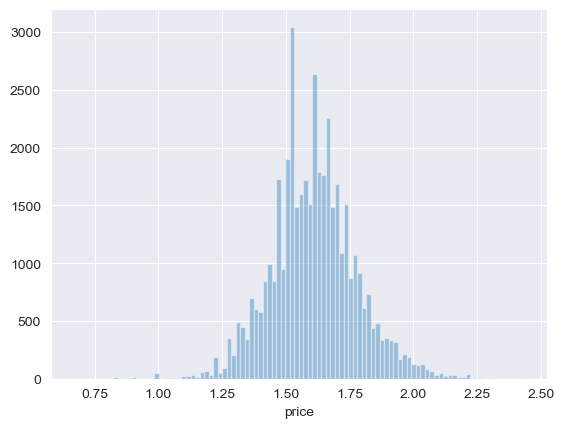

In [572]:
sns.distplot(df_skew['price'], kde = False, bins = 100)

C:\Users\Zhaoyq\AppData\Local\Temp\ipykernel_12440\1471286711.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log10(df_skew['price']), bins = 100, kde = False)


<Axes: xlabel='price'>

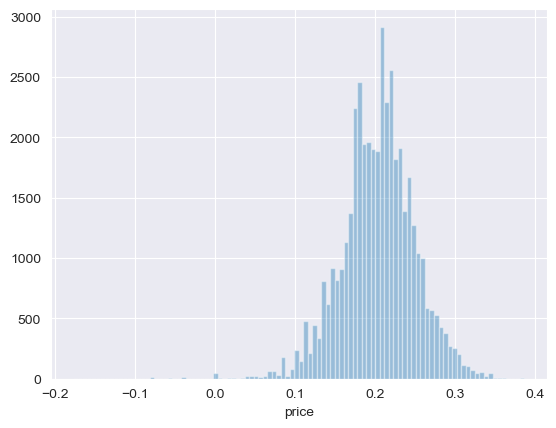

In [573]:
sns.distplot(np.log10(df_skew['price']), bins = 100, kde = False)

In [574]:
df_skew['price'] = np.log(df_skew['price'])

## split data into X y

In [575]:
index = list(np.arange(df_skew.shape[1]))
df_skew.columns.get_loc('price')

17

In [576]:
index.remove(17)

In [577]:
X = df_skew.iloc[:, index]
y = df_skew.iloc[:, 17]

In [578]:

y.describe()
# 

count    43062.000000
mean         0.469235
std          0.105417
min         -0.406871
25%          0.406497
50%          0.475538
75%          0.535699
max          0.889710
Name: price, dtype: float64

In [579]:
X = pd.get_dummies(X, drop_first=True)
X

,host_response_time,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,bathrooms_text,bedrooms,beds,minimum_nights,...,host_identity_verified_True,neighbourhood_group_cleansed_Other Cities,neighbourhood_group_cleansed_Unincorporated Areas,property_type_hotel,room_type_Hotel room,room_type_Private room,room_type_Shared room,has_availability_True,license_True,instant_bookable_True
0,1.00,1.000000,1.000000,4.0,9.0,3.0,1.0,1.0,2.0,31.0,...,1,0,0,0,0,1,0,1,0,0
1,13.00,1.000000,0.170000,1.0,3.0,2.0,1.0,1.0,2.0,30.0,...,0,0,0,0,0,1,0,1,0,0
2,5.00,1.000000,0.000000,1.0,3.0,6.0,2.0,2.0,2.0,30.0,...,1,1,0,0,0,0,0,1,0,0
3,1.00,1.000000,0.990000,12.0,12.0,2.0,1.0,1.0,1.0,60.0,...,1,1,0,0,0,0,0,1,0,0
4,3.11,0.959705,0.897212,20.0,24.0,1.0,11.0,1.0,1.0,2.0,...,0,0,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43758,1.00,0.980000,0.590000,34.0,84.0,3.0,1.0,1.0,2.0,1.0,...,1,1,0,0,0,0,0,1,0,0
43759,1.00,1.000000,0.930000,2.0,3.0,2.0,1.0,1.0,1.0,1.0,...,1,1,0,0,0,1,0,1,0,0
43760,1.00,0.980000,0.590000,34.0,84.0,3.0,1.0,1.0,2.0,1.0,...,1,1,0,0,0,0,0,1,0,0
43761,1.00,0.980000,0.590000,34.0,84.0,3.0,1.0,1.0,2.0,1.0,...,1,1,0,0,0,0,0,1,0,0


In [607]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [614]:
X_test.shape

(8613, 61)

In [608]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [615]:
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [610]:
from sklearn.decomposition import PCA

Text(0, 0.5, 'cumulative explained variance')

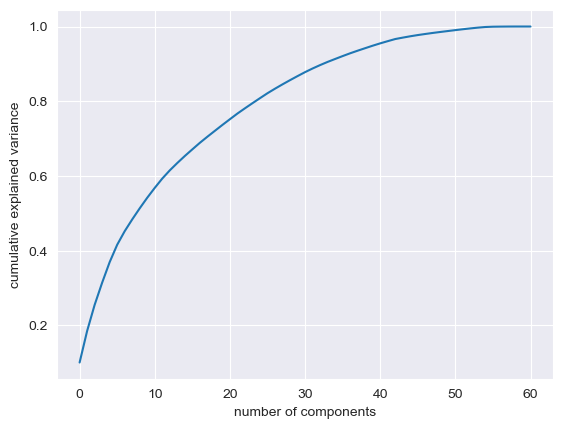

In [616]:
pca = PCA().fit(X_train_sc)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [617]:
#the number of components that capture around 95% of the variance is around 35
pca_x = PCA(35)
X_train_pca = pca_x.fit_transform(X_train_sc)
X_test_pca = pca_x.transform(X_test_sc)

In [618]:
X_test_pca.shape

(8613, 35)

## built the models

In [599]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [619]:
y_test.shape, X_test_pca.shape

((8613,), (8613, 35))

## Mutiple LR

In [621]:
lr = LinearRegression()
lr.fit(X_train_pca, y_train)
y_pred_lr = lr.predict(X_test_pca)
mean_squared_error(y_test, y_pred_lr)

0.004329897775968891

## Decision Tree

In [623]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train_pca, y_train)
y_pred_dt = dt.predict(X_test_pca)
mean_squared_error(y_test, y_pred_dt)

0.007443381382915692

## Random Forest

In [626]:
rf = RandomForestRegressor(100, random_state=42)
rf.fit(X_train_pca, y_train)
y_pred_rf = rf.predict(X_test_pca)
mean_squared_error(y_test, y_pred_rf)

0.0034614323861269403

## SVR

In [625]:
svr = SVR()
svr.fit(X_train_pca, y_train)
y_pred_svr = svr.predict(X_test_pca)
mean_squared_error(y_test, y_pred_svr)

0.003899467862566247

## report

Random forest has the lowest mse value, so it has the greatest performance. the mse of others have little difference from the one of Random forest, so they are also acceptable